<a href="https://colab.research.google.com/github/vigneshsurya1/insurance-cost-prediction/blob/main/insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
uncleaned_df= pd.read_csv('/content/insurance.csv')

In [ ]:
uncleaned_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
uncleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
uncleaned_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df=pd.DataFrame(uncleaned_df)
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

# there is a duplicate value in the dataframe so it needs to be deleted


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().value_counts()

False    1337
Name: count, dtype: int64

# treating the outliers

In [ ]:
import matplotlib.pyplot as plt


<ipython-input-19-dfe82fd5f1c9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-19-dfe82fd5f1c9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-19-dfe82fd5f1c9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn

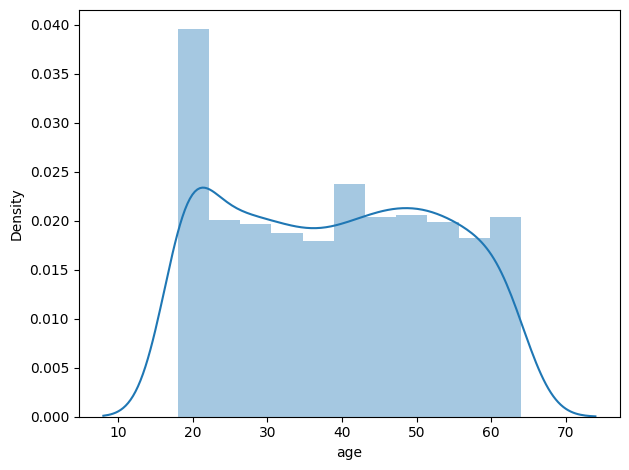

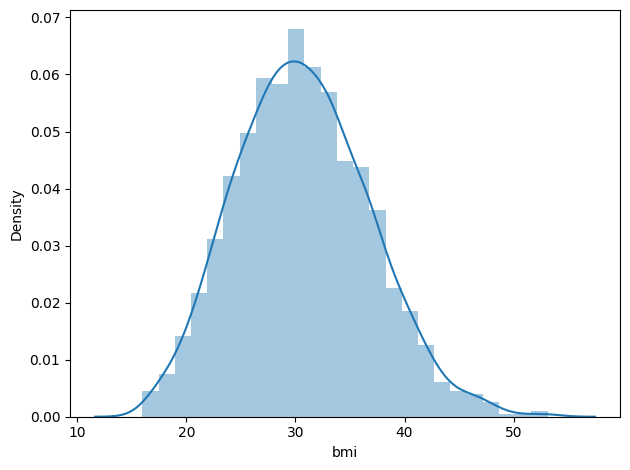

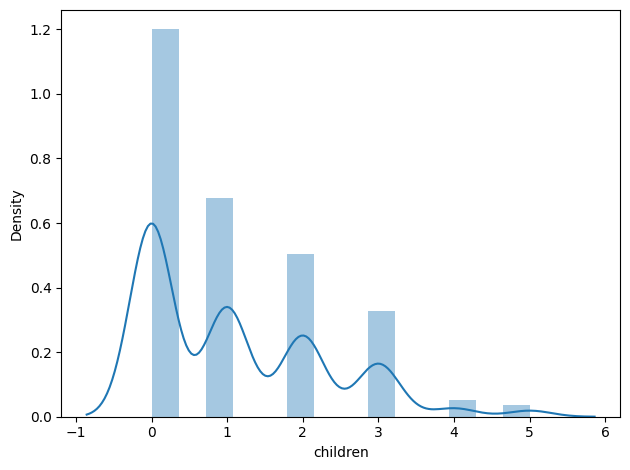

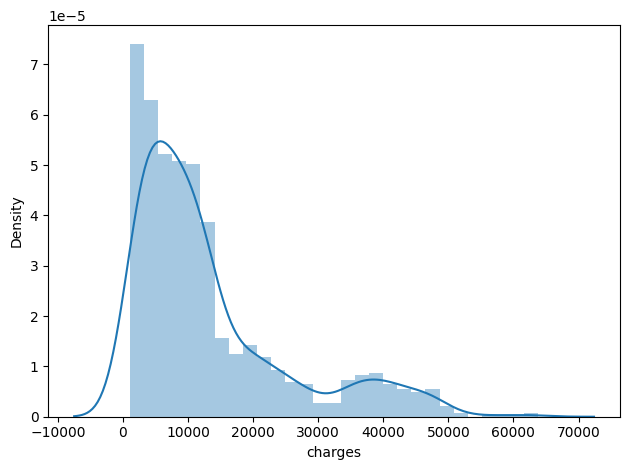

In [ ]:
numerical_df = df.select_dtypes(include='number')
for col in numerical_df:
  plt.figure()
  sns.distplot(df[col])
  plt.tight_layout()

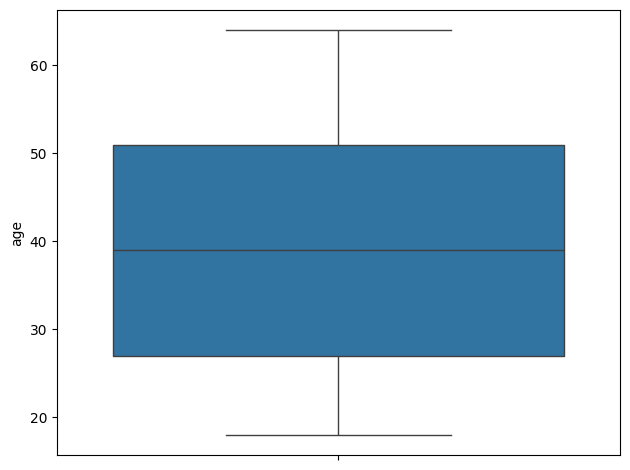

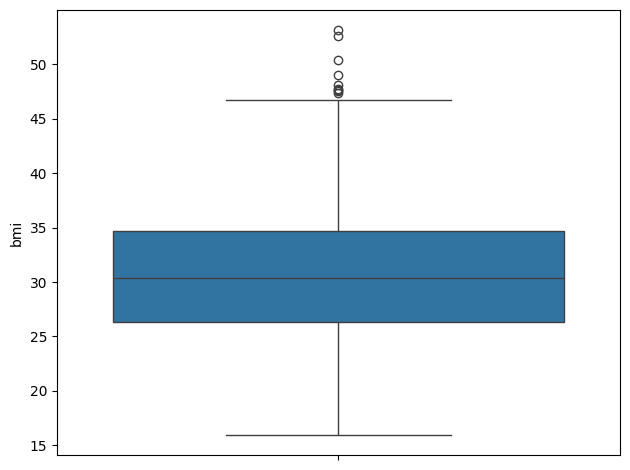

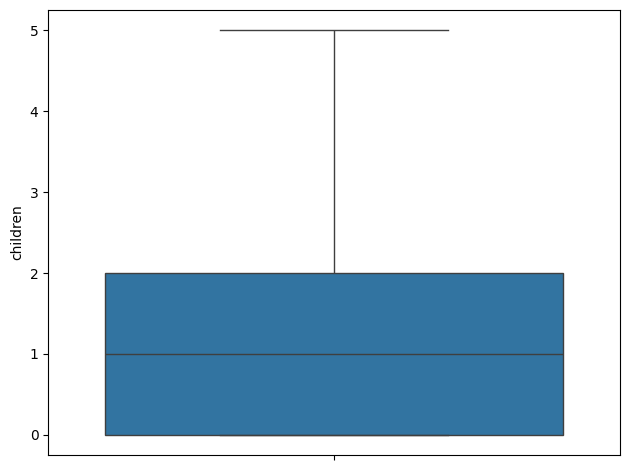

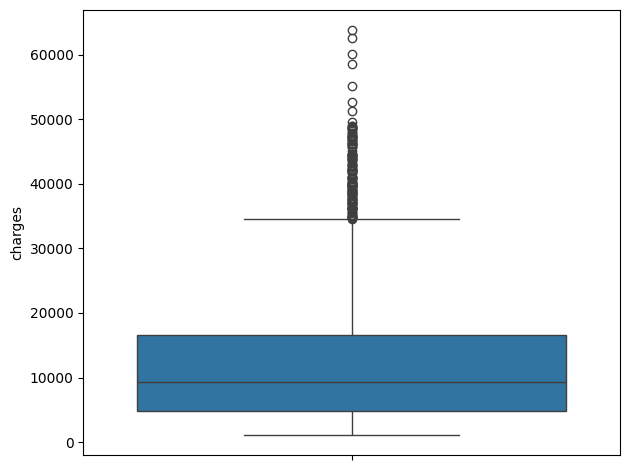

In [ ]:
numerical_df = df.select_dtypes(include='number')
for col in numerical_df:
  plt.figure()
  sns.boxplot(df[col])
  plt.tight_layout()

**BMI and charges has some outliers**
BMI IS NORMALLY DISTRIBUTED SO IT IS TREATED with Z-SCORE METHOD


In [ ]:
print("Max allowed",df['bmi'].mean() + 3*df['bmi'].std())
print("Min allowed",df['bmi'].mean() - 3*df['bmi'].std())

Max allowed 48.96485698651382
Min allowed 12.362046528819015


In [ ]:
df['bmi'] = np.where(
    df['bmi']>49,
    49,
    np.where(
        df['bmi']<12.4,
        12.4,
        df['bmi']
    )
)

<Axes: xlabel='bmi'>

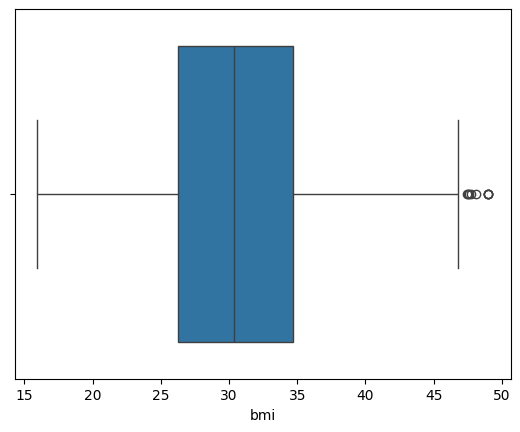

In [ ]:
sns.boxplot(df['bmi'],orient='h')

In [ ]:
Q3 = np.quantile(df['charges'], 0.75)
Q1 = np.quantile(df['charges'], 0.25)
iqr = Q3 - Q1

upper_limit = df['charges'].quantile(0.75) + 1.5 * iqr
lower_limit = df['charges'].quantile(0.25) - 1.5 * iqr

In [ ]:
df['charges'] = np.where(
    df['charges']>upper_limit,
    upper_limit,
    np.where(
        df['charges']<lower_limit,
        lower_limit,
        df['charges']
    )
)

<Axes: xlabel='charges'>

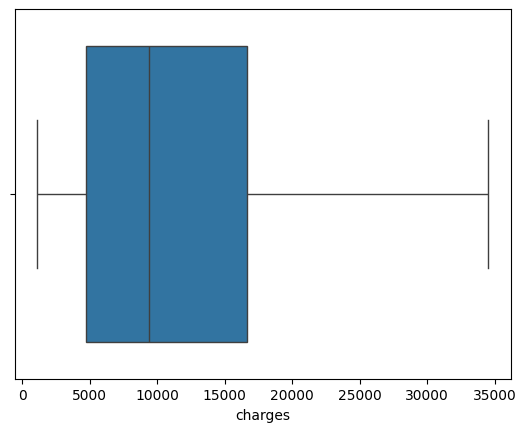

In [ ]:
sns.boxplot(df['charges'],orient='h')

# EDA

<Axes: xlabel='charges', ylabel='children'>

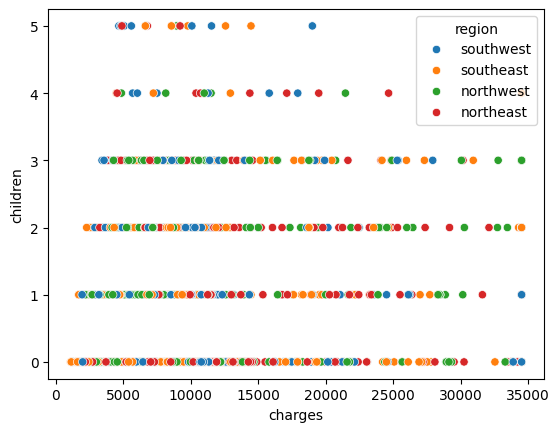

In [ ]:
sns.scatterplot(x=df['charges'],y=df['children'],hue=df['region'])

we can see that

1.  increase in children count less charges are
2.  



<Axes: xlabel='sex', ylabel='count'>

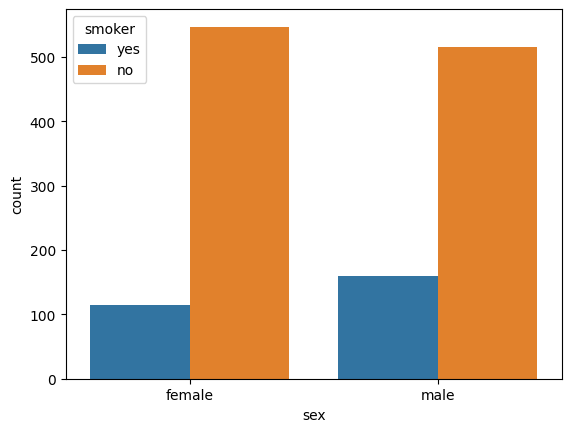

In [ ]:
sns.countplot(x=df['sex'],hue=df['smoker'])

<Axes: xlabel='charges', ylabel='region'>

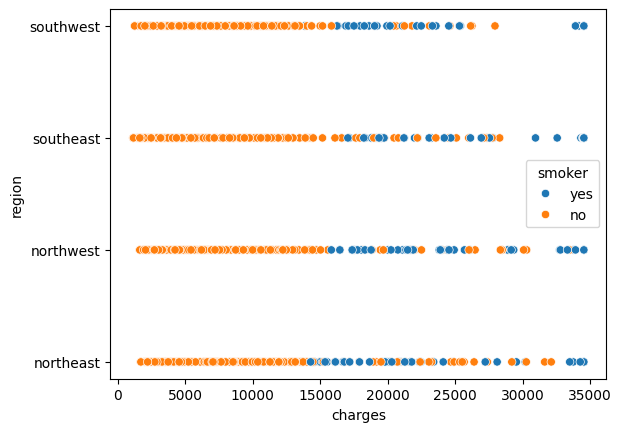

In [ ]:
sns.scatterplot(x=df['charges'],y=df['region'],hue=df['smoker'])



1.   smoking people has more charges
2.   most smokers are from north east and northwest region



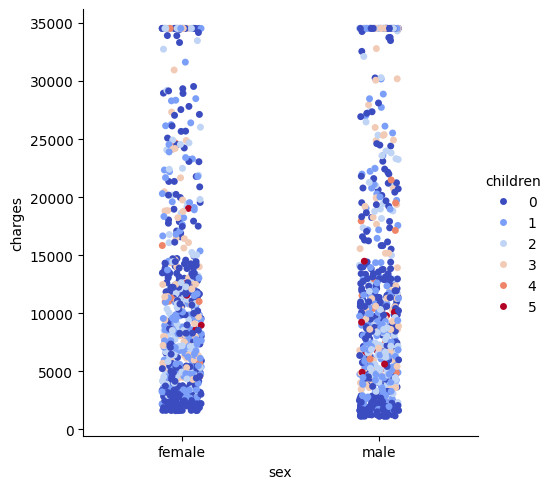

In [ ]:
sns.catplot(x=df['sex'], y=df['charges'],hue=df['children'],palette='coolwarm')

**Data Preprocessing\**

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])


In [ ]:
ss=StandardScaler()
df['age']=ss.fit_transform(df['age'].values.reshape(-1, 1))
df['bmi']=ss.fit_transform(df['bmi'].values.reshape(-1, 1))
df['charges']=ss.fit_transform(df['charges'].values.reshape(-1, 1))

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,0,-0.453717,0,1,3,0.432384
1,-1.511647,1,0.512441,1,0,2,-1.059429
2,-0.799350,1,0.385705,3,0,2,-0.791373
3,-0.443201,1,-1.308774,0,0,1,0.934224
4,-0.514431,1,-0.292416,0,0,1,-0.848706


**model training and comparing**

In [ ]:
x=df.drop(['charges'], axis=1)
y=df['charges']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


In [ ]:
x_train.head()

,age,sex,bmi,children,smoker,region
1114,-1.155499,1,-1.011685,0,0,0
968,-1.297958,1,-0.808413,2,0,0
599,0.910164,0,1.130485,2,0,1
170,1.693691,1,1.779802,0,0,2
275,0.554015,0,-0.667687,2,0,0


# model comparsion

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
reg=lr.fit(x_train,y_train)


In [ ]:
pred=reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE",mean_absolute_error(y_test,pred))
print("MSE",mean_squared_error(y_test,pred))
print("R2",r2_score(y_test,pred))

MAE 0.3098724677799187
MSE 0.20296470730270802
R2 0.8206456416750101


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf_pred=rf.predict(x_test)

In [ ]:
print("MAE",mean_absolute_error(y_test,rf_pred))
print("MSE",mean_squared_error(y_test,rf_pred))
print("R2",r2_score(y_test,rf_pred))

MAE 0.22180991566507116
MSE 0.17489816334493943
R2 0.8454472786139783


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt_pred=dt.predict(x_test)


In [ ]:
print("MAE",mean_absolute_error(y_test,dt_pred))
print("MSE",mean_squared_error(y_test,dt_pred))
print("R2",r2_score(y_test,dt_pred))

MAE 0.2417619334337048
MSE 0.33825833218885715
R2 0.7010903672660124


***random forest model performs well***